As far as one can tell outside of the Japanese cultural context, video games are incredibly important to Japanese culture. They have produced some of the most notable, memorable, and financially successful video game franchises, and Japanese video game companies tower over those of other nations in terms of power and influence within the industry.

The purpose of this project is to (1) pose some hypotheses about the relationship between Japan and video games and (2) use data science to gather evidence in order to arrive at some conclusions. 

# Hypotheses

The subject matter of our hypotheses will involve questions about both the video games that come out of Japan as well as Japanese tastes as contrast with the tastes of other gamers around the world. Moreover, we will narrow our features of investigation to that of video game genre, which may provide fuel for inference and extrapolation in other research projects concerning the particularities of Japanese art and culture that make them distinctive from the rest of the world. That being said, here are the hypotheses we will be investigation: 

Hypothesis 1: Japanese gamers are disproportionately interested in fighting games as opposed to other more general action games. 

This hypothesis derives from the fact that fighting games, as might be found arcades, originated in Japan in the late 1980s and early 1990s. 

Hypothesis 2: Japanese video game tastes will be the most distinct of any of the regions in our dataset. 

This is based on my knowledge of Japanese media in general and its notably distinctive nature. 

Hypothesis 3: Japanese video game makers are the most interested in serving their fanbase than those in any of the regions in our dataset.

Hypothesis 4: Japanese video game tastes have been changing over time.

# Dataset

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include:

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

The script used to scrape the data is available at https://github.com/GregorUT/vgchartzScrape. It is based on BeautifulSoup using Python. There are 16,598 records. 2 records were dropped due to incomplete information.

First we load the data from the csv file:

In [285]:
import numpy as np
import pandas as pd 
import collections
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('vgsales.csv')

Now let's see some example data:

In [286]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Investigating the Data

Now we will look at the distribution of total game sales by genre with a heatmap:

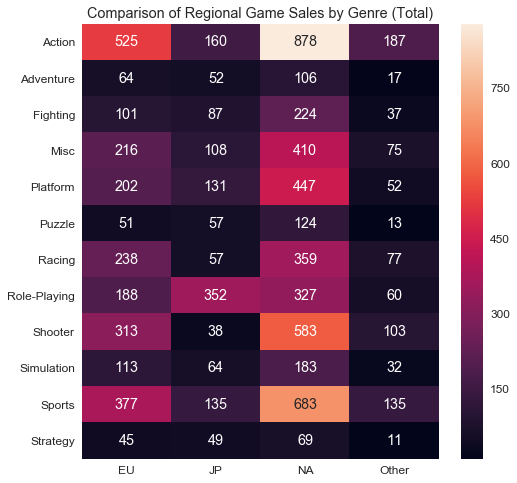

In [287]:
regions = ['JP', 'NA', 'EU', 'Other']
count_dict = {}

for region in regions: 
    dic = collections.defaultdict(int)
    for index, row in df.iterrows(): 
        dic[row['Genre']] += row[region+'_Sales']
    count_dict[region] = dic
        
total_genre_sales_df = pd.DataFrame(count_dict)

plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
sns.heatmap(total_genre_sales_df, annot=True, fmt='.0f')
plt.title("Comparison of Regional Game Sales by Genre (Total)")
plt.show()

However, the information in this graph should be taken with a grain of salt, as we have not corrected for the population differences between the regions represented. The populations of North America, the European Union, and the other areas of the world all outnumber that of Japan, so it does not mean much that Japan is underrepresented in game sales within certian genres. 

In order to account for this, we will now divide each value by the total game sales for its correlating region and display the corrected graph:

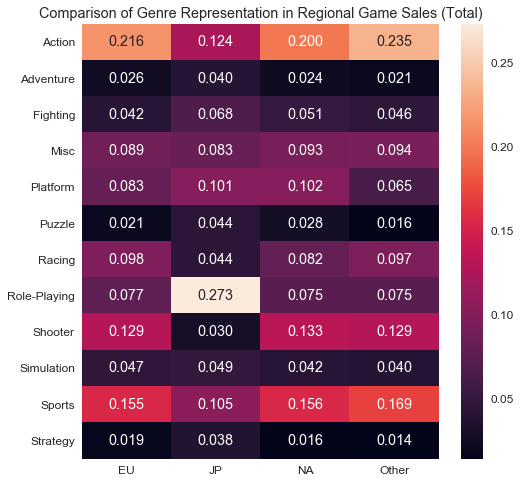

In [288]:
regions = ['JP', 'NA', 'EU', 'Other']
count_dict = {}

for region in regions: 
    dic = collections.defaultdict(int)
    for index, row in df.iterrows(): 
        dic[row['Genre']] += row[region+'_Sales']
    for genre in dic.keys():
        dic[genre] /= df[region+'_Sales'].sum()
    count_dict[region] = dic
        
total_genre_sales_ratio_df = pd.DataFrame(count_dict)

plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
sns.heatmap(total_genre_sales_ratio_df, annot=True, fmt='.3f')
plt.title('Comparison of Genre Representation in Regional Game Sales (Total)')
plt.show()

Now we do the same thing but only for the 1000 best selling games for each region:

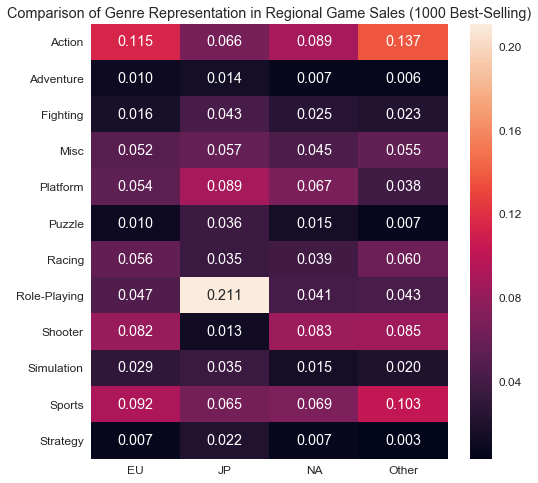

In [289]:
regions = ['JP', 'NA', 'EU', 'Other']
count_dict = {}

for region in regions: 
    dic = collections.defaultdict(int)
    for index, row in df.nlargest(1000, region+'_Sales').iterrows(): 
        dic[row['Genre']] += row[region+'_Sales']
    for genre in dic.keys():
        dic[genre] /= df[region+'_Sales'].sum()
    count_dict[region] = dic
        
top_1000_genre_sales_ratio_df = pd.DataFrame(count_dict)

plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
sns.heatmap(top_1000_genre_sales_ratio_df, annot=True, fmt='.3f')
plt.title('Comparison of Genre Representation in Regional Game Sales (1000 Best-Selling)')
plt.show()

At this point, we realize that we cannot make accurate conclusions about the above data before accounting for a special bias not yet noted. Specifically, the top Japanese games are often only sold in Japan to begin with, making it somewhat errorenous to include the genres of those game sales in regional comparisons. When we investigate the number of games that are only sold in Japan, we find it to be 3137:


In [290]:
df['JP_Global_Sales_Ratio'] = df.apply(lambda row: row['JP_Sales'] / row['Global_Sales'], axis=1)
df['NA_Global_Sales_Ratio'] = df.apply(lambda row: row['NA_Sales'] / row['Global_Sales'], axis=1)
df['EU_Global_Sales_Ratio'] = df.apply(lambda row: row['EU_Sales'] / row['Global_Sales'], axis=1)
df['Other_Global_Sales_Ratio'] = df.apply(lambda row: row['Other_Sales'] / row['Global_Sales'], axis=1)

print('Number of games only sold in Japan: ' + str(len(df[df['JP_Global_Sales_Ratio'] == 1])))

Number of games only sold in Japan: 3137


This accounts for nearly 20% of all games in our dataset! In comparison, relatively few games are only sold intra-regionally in countries other than Japan:

In [291]:
print('Number of games only sold in North America: ' + str(len(df[df['NA_Global_Sales_Ratio'] == 1])))
print('Number of games only sold in the European Union: ' + str(len(df[df['EU_Global_Sales_Ratio'] == 1])))
print('Number of games only sold in other areas: ' + str(len(df[df['Other_Global_Sales_Ratio'] == 1])))


Number of games only sold in North America: 769
Number of games only sold in the European Union: 465
Number of games only sold in other areas: 1


Therefore, we need to correct for this immediately by only examining games that sell internationally. We will replot the 

/Users/ianscottknight/anaconda/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


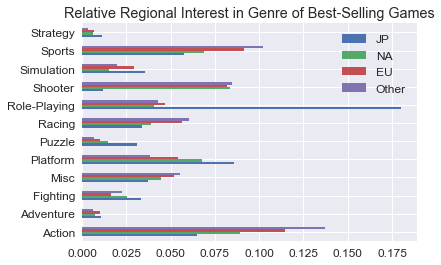

In [292]:
regions = ['JP', 'NA', 'EU', 'Other']
count_dict = {}

for region in regions: 
    dic = collections.defaultdict(int)
    for index, row in df[df[region+'_Global_Sales_Ratio'] < 1.0].nlargest(1000, region+'_Sales').iterrows(): 
        dic[row['Genre']] += row[region+'_Sales']
    for genre in dic.keys():
        dic[genre] /= df[region+'_Sales'].sum()
    count_dict[region] = dic
        
top_1000_genre_sales_ratio_df = pd.DataFrame(count_dict)

top_1000_genre_sales_ratio_df.plot(x=genre_counts_df.index, y=['JP', 'NA', 'EU', 'Other'], kind='barh', title='Relative Regional Interest in Genre of Best-Selling Games')



Observations: 

1. Role-playing games are hugely disproportionately popular in Japan compared to other regions.

2. Puzzle games are fairly disproportionately popular in Japan compared to other regions.

3. Strategy games are fairly disproportionately popular in Japan compared to other regions.

4. Action games are fairly disproportionately unpopular in Japan compared to other regions.

5. Racing games are fairly disproportionately unpopular in Japan compared to other regions.

6. Sports games are fairly disproportionately unpopular in Japan compared to other regions.

7. Shooter games are hugely disproportionately unpopular in Japan compared to other regions.

8. All other genres (adventure, fighting, platform, simulation, and miscellaneous) are pretty much equally popular in Japan as they are in other regions.

In [293]:
dic = collections.defaultdict(int)
for index, row in df[df['JP_Global_Sales_Ratio'] == 1].iterrows(): 
    dic[row['Genre']] += row['JP_Sales']
        
print('Number of games of each genre sold only within Japan')        

for key in dic.keys():
    print(key + ': ' + str(round(dic[key], 3)) + ' million')

Number of games of each genre sold only within Japan
Role-Playing: 98.08 million
Misc: 53.23 million
Platform: 13.7 million
Action: 49.25 million
Strategy: 31.03 million
Racing: 6.88 million
Fighting: 31.75 million
Shooter: 10.2 million
Sports: 50.0 million
Puzzle: 14.14 million
Simulation: 12.79 million
Adventure: 32.64 million


Analysis: 

One of our hypotheses

/Users/ianscottknight/anaconda/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


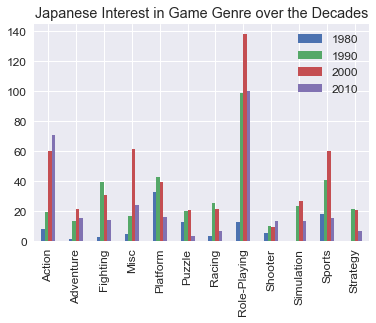

In [294]:
count_dict = {}
decades = [1980, 1990, 2000, 2010]

for decade in decades:
    dic = collections.defaultdict(int)
    for genre in top_1000_genre_sales_ratio_df.index:
        temp = df[df['Year']//10*10 == decade]
        for index, row in temp[temp['Genre'] == genre].iterrows(): 
            dic[genre] += row['JP_Sales']
    count_dict[decade] = dic

decade_genre_sales_df = pd.DataFrame(count_dict)

decade_genre_sales_df.plot(x=decade_genre_sales_df.index, y=[1980, 1990, 2000, 2010], kind='bar', title='Japanese Interest in Game Genre over the Decades')


# Analysis of Hypotheses

Hypothesis 1: Japanese gamers are disproportionately interested in fighting games as opposed to other more general action games. 

This hypothesis is rejected, as we demonstrated that there is little to no increased interest in fighting games in Japan relative to other regions. This is evinced by proportion of games sold of the fighting genre within Japan. In actuality, the games most disproportionately purchased in Japan are of the following genres: role-playing, puzzle, and strategy. 

Hypothesis 2: Japanese video game tastes will be the most distinct of any of the regions in our dataset. 

This hypothesis is supported by our investigation. Whenever there was an extreme deviation by a region in their relative interest in a genre, it was nearly always Japan. Please refer to Japanse relative interest in sports, shooter, and role-playing games to see this. 

Hypothesis 3: Japanese video game makers are the most interested in serving their fanbase than those in any of the regions in our dataset.

This hypothesis is supported by the evidence, as is clear from (1) the fact that Japan produces more games only intended to be sold intra-nationally (as opposed to internationally) than any other region in our dataset by a huge margin, and (2) Japanese video game tastes are the most unique.

Hypothesis 4: Japanese video game tastes have been changing over time.

This is clearly evinced by the final graph, which shows Japanese interest in various genres across 4 decades (1980s to 2010s). Whereas fighting games are currently relatively unpopular compared to 1990s and decreasing every decade since, action games are more popular than ever and have been increasing every decade. 